<!-- dom:TITLE: Project 1 on Machine Learning, deadline October 4, 2020 -->
# Project 1 on Machine Learning, deadline October 4, 2020
<!-- dom:AUTHOR: [Data Analysis and Machine Learning FYS-STK3155/FYS4155](http://www.uio.no/studier/emner/matnat/fys/FYS3155/index-eng.html) at University of Oslo, Norway -->
<!-- Author: -->  
**[Data Analysis and Machine Learning FYS-STK3155/FYS4155](http://www.uio.no/studier/emner/matnat/fys/FYS3155/index-eng.html)**, University of Oslo, Norway

Date: **Sep 10, 2021**

## Regression analysis and resampling methods

The main aim of this project is to study in more detail various
regression methods, including the Ordinary Least Squares (OLS) method,
The total score is **100** points. Each subtask has its own final score.


We will first study how to fit polynomials to a specific
two-dimensional function called [Franke's
function](http://www.dtic.mil/dtic/tr/fulltext/u2/a081688.pdf).  This
is a function which has been widely used when testing various
interpolation and fitting algorithms. Furthermore, after having
established the model and the method, we will employ resamling
techniques such as cross-validation and/or bootstrap in order to perform a
proper assessment of our models. We will also study in detail the
so-called Bias-Variance trade off.


The Franke function, which is a weighted sum of four exponentials  reads as follows

$$
\begin{align*}
f(x,y) &= \frac{3}{4}\exp{\left(-\frac{(9x-2)^2}{4} - \frac{(9y-2)^2}{4}\right)}+\frac{3}{4}\exp{\left(-\frac{(9x+1)^2}{49}- \frac{(9y+1)}{10}\right)} \\
&+\frac{1}{2}\exp{\left(-\frac{(9x-7)^2}{4} - \frac{(9y-3)^2}{4}\right)} -\frac{1}{5}\exp{\left(-(9x-4)^2 - (9y-7)^2\right) }.
\end{align*}
$$

The function will be defined for $x,y\in [0,1]$.  Our first step will
be to perform an OLS regression analysis of this function, trying out
a polynomial fit with an $x$ and $y$ dependence of the form $[x, y,
x^2, y^2, xy, \dots]$. We will also include bootstrap first as
a resampling technique.  After that we will include the cross-validation technique. As in homeworks 1 and 2, we can use a uniform
distribution to set up the arrays of values for $x$ and $y$, or as in
the example below just a set of fixed 
values for $x$ and $y$ with a given step
size.  We will fit a
function (for example a polynomial) of $x$ and $y$.  Thereafter we
will repeat much of the same procedure using the Ridge and Lasso
regression methods, introducing thus a dependence on the bias
(penalty) $\lambda$.

Finally we are going to use (real) digital terrain data and try to
reproduce these data using the same methods. We will also try to go
beyond the second-order polynomials metioned above and explore 
which polynomial fits the data best.


The Python code for the Franke function is included here (it performs also a three-dimensional plot of it)

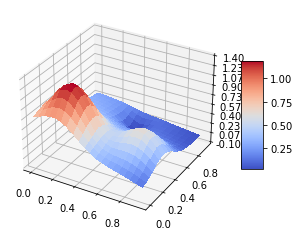

In [1]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)


def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4


z = FrankeFunction(x, y)


# Plot the surface
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# Exercise 1: Ordinary Least Square (OLS) on the (score 10 points)

We will generate our own dataset for a function
$\mathrm{FrankeFunction}(x,y)$ with $x,y \in [0,1]$. The function
$f(x,y)$ is the Franke function. You should explore also the addition
of an added stochastic noise to this function using the normal
distribution $\cal{N}(0,1)$.

*Write your own code* (using either a matrix inversion or a singular
value decomposition from e.g., **numpy** ) or use your code from
homeworks 1 and 2 and perform a standard least square regression
analysis using polynomials in $x$ and $y$ up to fifth order. Find the
[confidence intervals](https://en.wikipedia.org/wiki/Confidence_interval) of the parameters (estimators) $\beta$ by computing their
variances, evaluate the Mean Squared error (MSE)

$$
MSE(\hat{y},\hat{\tilde{y}}) = \frac{1}{n}
\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2,
$$

and the $R^2$ score function.  If $\tilde{\hat{y}}_i$ is the predicted
value of the $i-th$ sample and $y_i$ is the corresponding true value,
then the score $R^2$ is defined as

$$
R^2(\hat{y}, \tilde{\hat{y}}) = 1 - \frac{\sum_{i=0}^{n - 1} (y_i - \tilde{y}_i)^2}{\sum_{i=0}^{n - 1} (y_i - \bar{y})^2},
$$

where we have defined the mean value  of $\hat{y}$ as

$$
\bar{y} =  \frac{1}{n} \sum_{i=0}^{n - 1} y_i.
$$

Your code has to include a scaling of the data (for example by
subtracting the mean value), and
a split of the data in training and test data. For this exercise you can
either write your own code or use for example the function for
splitting training data provided by the library **Scikit-Learn** (make
sure you have installed it).  This function is called
$train\_test\_split$.  **You should present a critical discussion of why and how you have scaled or not scaled the data**.

It is normal in essentially all Machine Learning studies to split the
data in a training set and a test set (eventually  also an additional
validation set).  There
is no explicit recipe for how much data should be included as training
data and say test data.  An accepted rule of thumb is to use
approximately $2/3$ to $4/5$ of the data as training data.


You can easily reuse the solutions to your exercises from week 35 and week 36.




In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model as skl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import pandas as pd
from random import random, seed



def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

def create_X(x, y, n ):
    L = ['1']
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n+1)*(n+2)/2) # Number of elements in beta
    X = np.ones((N,l))

    for i in range(1,n+1):
        q = int((i)*(i+1)/2)
        for k in range(i+1):
            X[:,q+k] = (x**(i-k))*(y**k)
            if (i == 0 and k == 0) :
                L.append('1')
            elif(i-k == 0):
                L.append('Y^' + str(k))
            elif (k == 0):
                L.append('X^' + str(i-k))
            elif (i==2 and k == 1):
                L.append('XY')
            elif(i-k == 1):
                L.append('X'+'Y^' + str(k))
            elif (k == 1):
                L.append('X^' + str(i-k)+'Y')
            else :
                L.append('X^' + str(i-k)+'Y^'+ str(k))
    return X, L

def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)


def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

def FrankeFunctionWithNoise(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    noise = np.random.normal(0, 0.1, len(x)*len(x))
    return term1 + term2 + term3 + term4 + noise.reshape(len(x), len(x))

---------- Using OLS on Franke function ---------- 


Polynomial degree: 1
MSE training :  0.023650451792281688
MSE test :  0.035349284479213726
R2 training :  0.7000275307159695
R2 test :  0.6727044029341659

 

Polynomial degree: 2
MSE training :  0.01850005181901658
MSE test :  0.012469064089955826
R2 training :  0.7741477040714015
R2 test :  0.8451214354755949

 

Polynomial degree: 3
MSE training :  0.007937017060137105
MSE test :  0.006217366375414901
R2 training :  0.9049752956478205
R2 test :  0.9049032114402298

 

Polynomial degree: 4
MSE training :  0.0040050963988615094
MSE test :  0.0035169656285948523
R2 training :  0.9518073780076225
R2 test :  0.9495452819329391

 

Polynomial degree: 5
MSE training :  0.002082549917295724
MSE test :  0.00398753917960689
R2 training :  0.9741503284245401
R2 test :  0.9569585576099561

 

Polynomial degree: 6
MSE training :  0.0011006260926848183
MSE test :  0.0010958482768576826
R2 training :  0.9869670903697418
R2 test :  0.97971133783

,1,X^1,Y^1,X^2,XY,Y^2,X^3,X^2Y,XY^2,Y^3,...,X^9Y^6,X^8Y^7,X^7Y^8,X^6Y^9,X^5Y^10,X^4Y^11,X^3Y^12,X^2Y^13,XY^14,Y^15
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
1,0.963257,-0.471425,-0.665863,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
2,1.090755,-0.974758,-0.465015,0.072024,0.854895,-0.630172,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
3,0.888414,0.062820,1.656990,-2.591374,1.309849,-7.024074,1.575253,0.815695,-1.297142,4.917512,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
4,0.637780,4.219831,2.814895,-19.321173,-3.204462,-10.754118,25.182387,9.928647,2.017952,9.871110,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
5,0.563731,6.314558,2.533243,-26.810170,-12.183744,-4.070374,30.619347,38.904739,17.315557,-16.836121,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
6,0.688691,0.129387,1.932254,23.332738,8.206871,0.543283,-142.855154,-61.424973,2.574234,-48.264235,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
7,0.823092,-3.018397,-2.130332,44.836782,55.254322,31.744321,-216.390184,-239.449661,-209.077179,-156.652582,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
8,0.823131,-0.659673,-2.823827,-1.301474,64.644704,32.926006,107.266808,-177.275449,-355.531460,-100.063311,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
9,0.770188,1.453377,0.796566,-25.478345,-5.038313,-14.650089,279.537367,192.166057,254.600666,171.853721,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000


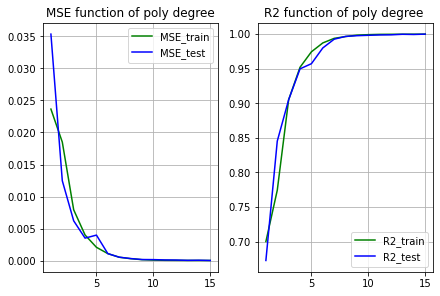

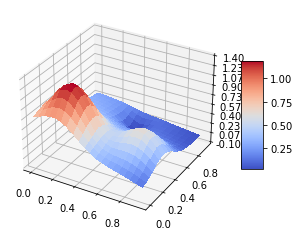

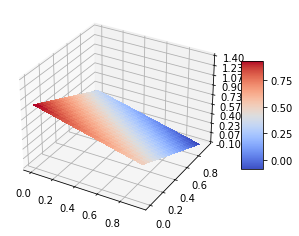

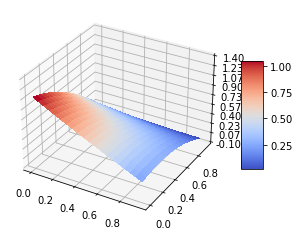

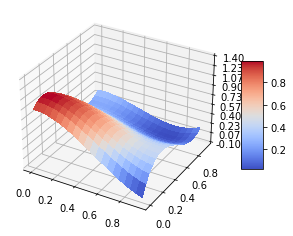

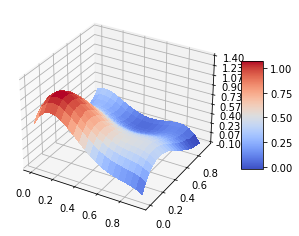

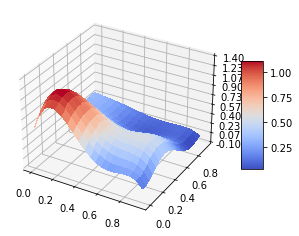

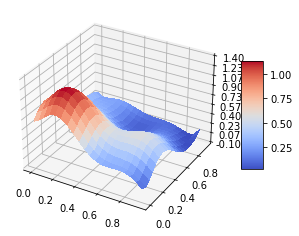

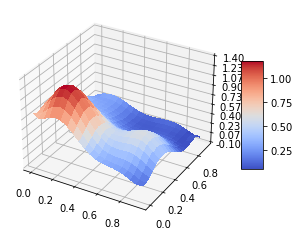

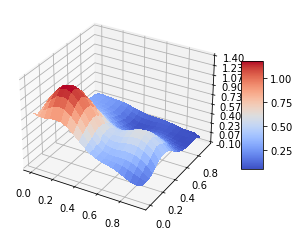

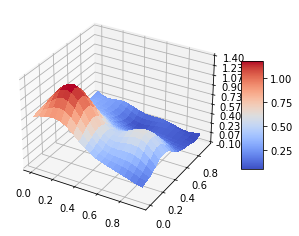

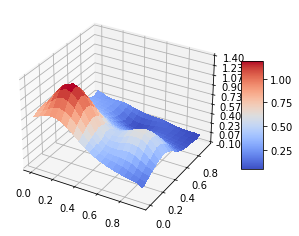

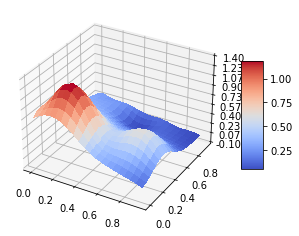

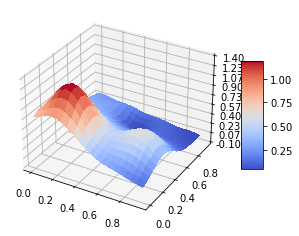

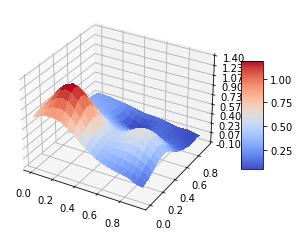

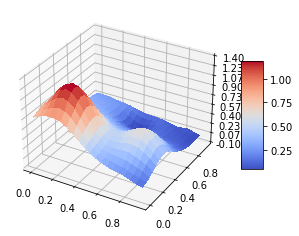

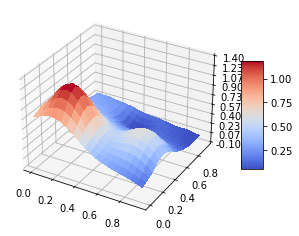

In [3]:
n = 15

x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x, y)
zp = FrankeFunction(x, y)
z = zp.reshape(len(x)*len(x), 1)


fig, axs = plt.subplots(1, 2, constrained_layout=True)

print("---------- Using OLS on Franke function ---------- \n\n")



MSE_train = []
MSE_test = []
R2_train = []
R2_test = []

list_degrees = range(1, n+1)

X, coeff = create_X(x, y, n)
BETA = np.zeros((n+1, len(coeff)))


fig = plt.figure()
ax = fig.gca(projection='3d')


surf = ax.plot_surface(x, y, zp, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

for i in list_degrees:
    
    X, L = create_X(x, y, n=i)
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.1)
    
    
    OLSbeta = np.linalg.pinv(X_train.T.dot(X_train)).dot(X_train.T).dot(z_train)
    ztildeOLS = X_train @ OLSbeta
    ztestOLS = X_test @ OLSbeta
    zplot = X @ OLSbeta
    zplot = zplot.reshape(len(x), len(x))
    
    for j in range(len(OLSbeta)) :
        BETA[i][j] = OLSbeta[j]
    MSE_train.append(MSE(z_train, ztildeOLS))
    MSE_test.append(MSE(z_test, ztestOLS))
    R2_train.append(R2(z_train, ztildeOLS))
    R2_test.append(R2(z_test, ztestOLS))


    degree = i
    print("Polynomial degree:", degree)
    print("MSE training : ", MSE_train[degree - 1])
    print("MSE test : ", MSE_test[degree - 1])
    print("R2 training : ", R2_train[degree - 1])
    print("R2 test : ", R2_test[degree - 1])
    print("\n \n")
    
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(x, y, zplot, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

    # Customize the z axis.
    ax.set_zlim(-0.10, 1.40)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)


    


axs[0].plot(list_degrees, MSE_train, 'green', label = 'MSE_train')
axs[0].plot(list_degrees, MSE_test, 'blue', label = 'MSE_test')
axs[0].set_title("MSE function of poly degree")
axs[0].legend()
axs[0].grid()

axs[1].plot(list_degrees, R2_train, 'green', label = "R2_train")
axs[1].plot(list_degrees, R2_test, 'blue', label = "R2_test")
axs[1].set_title("R2 function of poly degree ")
axs[1].legend()
axs[1].grid()

print("---------------------------- beta coefficient for each polynomial degree ----------------------------")
DesignMatrix = pd.DataFrame(BETA)
DesignMatrix.columns = coeff
display(DesignMatrix)


plt.show()

---------- Using OLS on Franke function with noise ---------- 


Polynomial degree: 1
MSE training :  0.0343339147094899
MSE test :  0.03257002943393927
R2 training :  0.6456481400350791
R2 test :  0.5709242223909246

 

Polynomial degree: 2
MSE training :  0.0267429593824207
MSE test :  0.0290519118400282
R2 training :  0.7007069045691271
R2 test :  0.718987794585132

 

Polynomial degree: 3
MSE training :  0.017102349439072823
MSE test :  0.014516262971962596
R2 training :  0.8131393721710729
R2 test :  0.8506768168014631

 

Polynomial degree: 4
MSE training :  0.011464448414022096
MSE test :  0.015549356671960824
R2 training :  0.8769538575628835
R2 test :  0.8293514773711004

 

Polynomial degree: 5
MSE training :  0.010886786352412118
MSE test :  0.008982157257624423
R2 training :  0.8851636533080862
R2 test :  0.894336083251859

 

Polynomial degree: 6
MSE training :  0.007897885037663657
MSE test :  0.013360762770756231
R2 training :  0.9020456804235072
R2 test :  0.90542383140

,1,X^1,Y^1,X^2,XY,Y^2,X^3,X^2Y,XY^2,Y^3,...,X^9Y^3,X^8Y^4,X^7Y^5,X^6Y^6,X^5Y^7,X^4Y^8,X^3Y^9,X^2Y^10,XY^11,Y^12
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.993278,-0.528229,-0.673365,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1.062342,-0.914574,-0.441179,0.046534,0.812437,-0.636186,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.823918,0.197918,1.898205,-2.568268,0.829749,-7.307295,1.433192,1.203337,-1.220522,5.038643,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.530550,5.152233,2.898074,-22.007414,-5.530949,-8.849307,28.591763,12.998507,3.767217,5.528430,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.500819,7.178426,1.938742,-32.728025,-13.181050,3.591259,49.478838,37.523573,15.534515,-38.470192,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.646905,0.922729,1.346814,15.047832,12.686961,2.200575,-111.216317,-78.850715,-11.611752,-36.059183,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.659151,1.325889,-1.236003,0.034325,32.660802,33.053528,4.364658,-129.719064,-137.976195,-179.096761,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.991222,-2.158393,-7.599777,-7.552492,112.989312,69.351423,204.343102,-423.318655,-593.138462,-230.109646,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.671992,1.125065,7.111555,-2.789686,20.848050,-166.542565,42.993483,-227.401211,277.378529,1586.472073,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


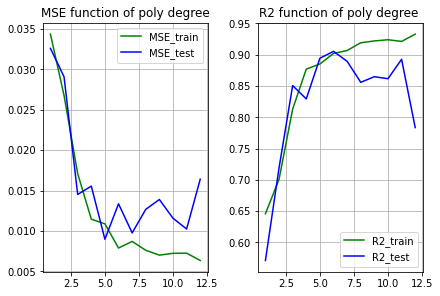

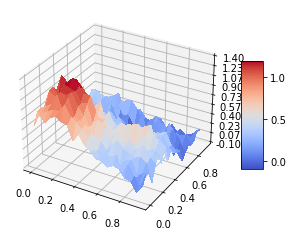

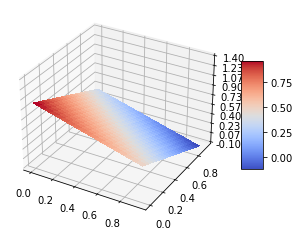

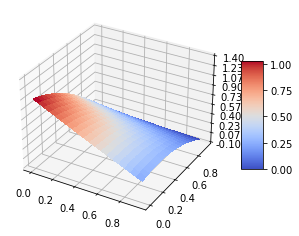

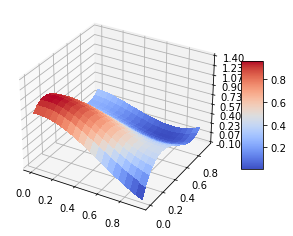

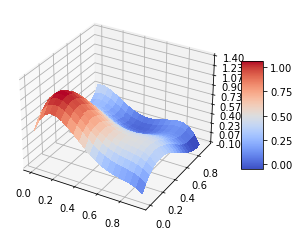

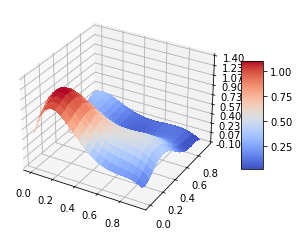

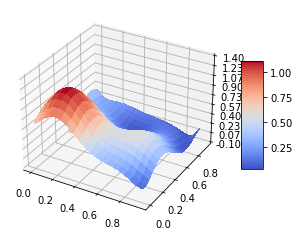

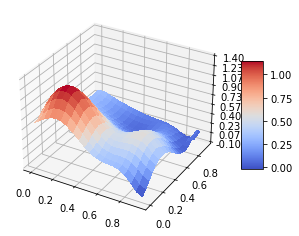

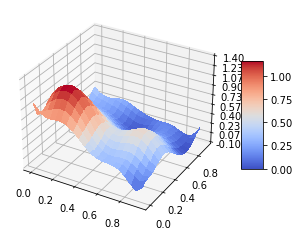

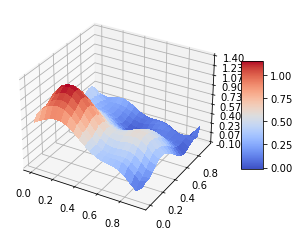

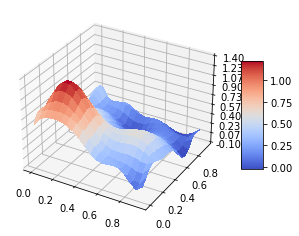

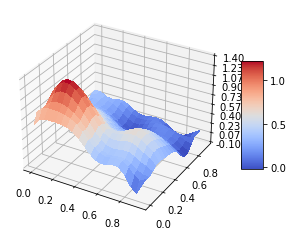

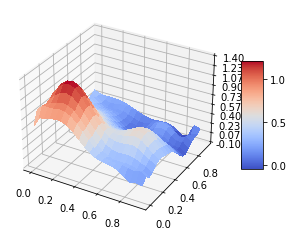

In [4]:
N = 20
n = 12

x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x, y)
zp = FrankeFunctionWithNoise(x, y)
z = zp.reshape(len(x)*len(x), 1)

fig, axs = plt.subplots(1, 2, constrained_layout=True)




print("---------- Using OLS on Franke function with noise ---------- \n\n")

MSE_train = []
MSE_test = []
R2_train = []
R2_test = []

list_degrees = range(1, n+1)

X, coeff = create_X(x, y, n)
BETA = np.zeros((n+1, len(coeff)))


fig = plt.figure()
ax = fig.gca(projection='3d')


surf = ax.plot_surface(x, y, zp, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)




for i in list_degrees:
    
    X, L = create_X(x, y, n=i)
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2)
    
    
    OLSbeta = np.linalg.pinv(X_train.T.dot(X_train)).dot(X_train.T).dot(z_train)
    ztildeOLS = X_train @ OLSbeta
    ztestOLS = X_test @ OLSbeta
    zplot = X @ OLSbeta
    
    zplot = zplot.reshape(len(x), len(x))
    
    for j in range(len(OLSbeta)) :
        BETA[i][j] = OLSbeta[j]
    MSE_train.append(MSE(z_train, ztildeOLS))
    MSE_test.append(MSE(z_test, ztestOLS))
    R2_train.append(R2(z_train, ztildeOLS))
    R2_test.append(R2(z_test, ztestOLS))


    degree = i
    print("Polynomial degree:", degree)
    print("MSE training : ", MSE_train[degree - 1])
    print("MSE test : ", MSE_test[degree - 1])
    print("R2 training : ", R2_train[degree - 1])
    print("R2 test : ", R2_test[degree - 1])
    print("\n \n")
  
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(x, y, zplot, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

    # Customize the z axis.
    ax.set_zlim(-0.10, 1.40)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)





axs[0].plot(list_degrees, MSE_train, 'green', label = 'MSE_train')
axs[0].plot(list_degrees, MSE_test, 'blue', label = 'MSE_test')
axs[0].set_title("MSE function of poly degree")
axs[0].legend()
axs[0].grid()

axs[1].plot(list_degrees, R2_train, 'green', label = "R2_train")
axs[1].plot(list_degrees, R2_test, 'blue', label = "R2_test")
axs[1].set_title("R2 function of poly degree ")
axs[1].legend()
axs[1].grid()

print("---------------------------- beta coefficient for each polynomial degree ----------------------------")
DesignMatrix = pd.DataFrame(BETA)
DesignMatrix.columns = coeff
display(DesignMatrix)




plt.show()